<a id="0"></a> <br>
## <span style='background :MistyRose'>Índice<span>

1. [Introdução](#1)
2. [Importação dos dados](#2)
3. [Inspeção e limpeza dos dados](#3)
4. [Análise](#4)
    <br>4.1. [Importar as bibliotecas necessárias](#41)
    <br>4.2. [Relação entre PIB e emissões de CO₂](#42)
    <br>4.3. [Emissões de CO₂ per capita do Brasil e da Suécia](#43)
    <br>4.4. [Emissões de CO₂ geradas por produção e por consumo no Brasil e na Suécia](#44)
    <br>4.5. [Composição das fontes emissoras de CO₂ no Brasil e na Suécia](#45)
    <br>4.6. [Associação entre emissões geradas pelo uso do petróleo e emissões anuais de CO₂ no Brasil e na Suécia](#46)
    <br>4.7. [Intensidade de carbono](#47)
5. [Conclusões](#5)
6. [Recomendações](#6)
7. [Apêndice](#7)
    <br>7.1. [Emissões anuais de CO₂ por classificação de renda](#71) 

<a id="1"></a>
## <span style='background :MistyRose'>1. Introdução</span>

Numa era marcada pela crescente urgência de enfrentamento da crise climática, a análise de dados se destaca como uma poderosa ferramenta para compreender e abordar a complexa dinâmica entre **crescimento econômico e sustentabilidade ambiental**. O presente projeto explora esta crítica dinâmica, se debruçando sobre os dados disponibilizados pela organização [Our World In Data](https://ourworldindata.org/co2-and-greenhouse-gas-emissions) acerca das **emissões de dióxido de carbono (CO₂) do Brasil**, um país que busca atingir seu compromisso de alcançar emissões *net zero* até 2050.

O Brasil tem papel crucial num mundo que confronta a necessidade de transição para um futuro mais sustentável, visto sua enorme biodiversidade, vastos recursos naturais, e significância geopolítica. O objetivo central deste projeto é avaliar se o Brasil tem **progredido em direção ao seu objetivo** de emissões *net zero*, e avaliar a **viabilidade do crescimento econômico concomitante à redução de emissões**, visto ser um país em pleno desenvolvimento.

Tendo em vista que a crise climática é um problema global, este projeto irá além das fronteiras do Brasil ao buscar *insights* na experiência histórica da **Suécia**, a qual foi capaz de dissociar crescimento do PIB e emissões de CO₂, propondo caminhos que o Brasil pode trilhar em direção a este delicado equilíbrio. O projeto também irá identificar potenciais **fatores que impulsionam o aumento e redução de emissões**, e formular **recomendações** baseadas em dados.

Para iluminar o contexto histórico por trás das tendências de aumento ou redução de emissões de CO₂, este projeto irá se apoiar no poder visual dos **gráficos de linha**, ilustrando uma narrativa ano-a-ano da trajetória de emissões do Brasil e Suécia. Além disso, **gráficos de dispersão** e a **correlação de Pearson** serão empregados para examinar os diversos fatores que podem estar por trás da variação de emissões ao longo do tempo. Ao unir análise de dados e considerações ambientais e econômicas, o presente projeto se propõe a elucidar caminhos para um futuro sustentável para o Brasil e, em extensão, para a comunidade global.

<a id="2"></a>
## <span style='background :MistyRose'>2. Importação dos dados</span>

In [1]:
# Importar a biblioteca pandas.
import pandas as pd

# Carregar o CSV com os dados que serão utilizados num DataFrame.
df = pd.read_csv('owid-co2-data.csv')

Para facilitar a manipulação e análise dos dados, os dados referentes às emissões do Brasil serão carregados num DataFrame separado (`df_br`). O mesmo será feito para os dados referentes às emissões da Suécia (`df_se`).

In [2]:
# Selecionar apenas os dados do Brasil e carregá-los no DataFrame df_br.
df_br = df[df.country == 'Brazil']

# Primeira inspeção do DataFrame com os dados do Brasil.
pd.set_option('display.max_columns', 79) # Exibe todas as colunas do DataFrame (79 no total).

df_br.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
6582,Brazil,1850,BRA,7233093.0,6.271878e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.058,5.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.611,NaN,NaN,NaN,NaN,1.611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6583,Brazil,1851,BRA,7346113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.241,5.342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.586,NaN,NaN,NaN,NaN,1.561,NaN,NaN,1.426,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6584,Brazil,1852,BRA,7460007.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.425,5.285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.572,NaN,NaN,NaN,NaN,1.545,NaN,NaN,1.426,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6585,Brazil,1853,BRA,7574774.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157.369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.644,5.234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.559,NaN,NaN,NaN,NaN,1.520,NaN,NaN,1.421,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
6586,Brazil,1854,BRA,7691306.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.864,5.183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550,NaN,NaN,NaN,NaN,1.515,NaN,NaN,1.415,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Selecionar apenas os dados da Suécia e carregá-los no DataFrame df_se.
df_se = df[df.country == 'Sweden']

# Primeira inspeção do DataFrame com os dados da Suécia.
df_se.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
44445,Sweden,1834,SWE,2972567.0,4.521862e+09,NaN,NaN,0.033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011,0.007,NaN,0.033,0.011,NaN,NaN,NaN,NaN,0.033,NaN,0.033,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.037,NaN,0.037,NaN,0.001,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44446,Sweden,1839,SWE,3098887.0,4.789508e+09,NaN,NaN,0.044,NaN,33.333,NaN,NaN,NaN,NaN,NaN,NaN,0.014,0.009,NaN,0.044,0.014,NaN,NaN,NaN,NaN,0.077,NaN,0.077,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.039,NaN,0.039,NaN,0.003,NaN,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44447,Sweden,1840,SWE,3127143.0,4.896864e+09,NaN,NaN,0.040,-0.004,-8.333,NaN,NaN,NaN,NaN,NaN,NaN,0.013,0.008,NaN,0.040,0.013,NaN,NaN,NaN,NaN,0.117,NaN,0.117,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.034,NaN,0.034,NaN,0.004,NaN,0.004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44448,Sweden,1841,SWE,3156963.0,4.888644e+09,NaN,NaN,0.040,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.013,0.008,NaN,0.040,0.013,NaN,NaN,NaN,NaN,0.158,NaN,0.158,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.033,NaN,0.033,NaN,0.005,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44449,Sweden,1842,SWE,3188373.0,4.708440e+09,NaN,NaN,0.081,0.040,100.000,NaN,NaN,NaN,NaN,NaN,NaN,0.025,0.017,NaN,0.081,0.025,NaN,NaN,NaN,NaN,0.238,NaN,0.238,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.062,NaN,0.062,NaN,0.007,NaN,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com base no escopo do projeto descrito na introdução, as seguintes colunas serão utilizadas para a análise dos dados:

* `year`: ano de observação.
* `co2`: emissões anuais de CO₂, excluindo mudanças no uso da terra, medido em milhões de toneladas.
* `co2_including_luc`: emissões  anuais de CO₂, incluindo mudanças no uso da terra, medido em milhões de toneladas.
* `co2_per_capita`: emissões anuais de CO₂, excluindo mudanças no uso da terra, medido em toneladas por pessoa.
* `consumption_co2`: emissões anuais de CO₂ geradas por consumo, medido em milhões de toneladas.
* `consumption_co2_per_capita`: emissões anuais de CO₂ geradas por consumo, medido em toneladas por pessoa.
* `gdp`: produto interno bruto medido em dólares internacionais, utilizando preços de 2011 para o ajuste de alterações de preço ao longo do tempo (inflação) e diferenças de preço entre países.
* `other_industry_co2`: emissões anuais de CO₂ geradas por outras fontes industriais, medido em milhões de toneladas.
* `flaring_co2`: emissões anuais de CO₂ geradas por *flaring* (queima de gás natural), medido em milhões de toneladas.
* `cement_co2`: emissões anuais de CO₂ geradas por cimento, medido em milhões de toneladas.
* `gas_co2`: emissões anuais de CO₂ geradas por gás natural, medido em milhões de toneladas.
* `coal_co2`: emissões anuais de CO₂ geradas por carvão, medido em milhões de toneladas.
* `oil_co2`: emissões anuais de CO₂ geradas por petróleo, medido em milhões de toneladas.
* `land_use_change_co2`: emissões anuais de CO₂ geradas por mudanças no uso da terra, medido em milhões de toneladas.
* `co2_per_unit_energy`: emissões anuais de CO₂, excluindo mudanças no uso da terra, medido em quilogramas por quilowatt-hora de consumo primário de energia.
* `share_global_cumulative_co2`: total cumulativo de emissões de CO₂, excluindo mudanças no uso da terra, medido como porcentagem do total global cumulativo de emissões de CO₂.

As colunas acima serão priorizadas durante a etapa de inspeção e limpeza dos dados.

<a id="3"></a>
## <span style='background :MistyRose'>3. Inspeção e limpeza dos dados</span>
Primeiramente, será verificada a quantidade de valores nulos presentes em cada coluna, e o tipo de dado de cada uma para `df_br` e `df_se`.

In [4]:
# Retornar o nome das colunas, contagem de valores não-nulos, e tipo de dado de cada uma para df_br.
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 6582 to 6753
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    172 non-null    object 
 1   year                                       172 non-null    int64  
 2   iso_code                                   172 non-null    object 
 3   population                                 172 non-null    float64
 4   gdp                                        150 non-null    float64
 5   cement_co2                                 94 non-null     float64
 6   cement_co2_per_capita                      94 non-null     float64
 7   co2                                        121 non-null    float64
 8   co2_growth_abs                             120 non-null    float64
 9   co2_growth_prct                            120 non-null    float64
 10  co2_including_luc     

In [5]:
# Retornar as colunas, contagem de valores não-nulos, e tipo de dado de cada uma para df_br.
df_se.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 44445 to 44628
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    184 non-null    object 
 1   year                                       184 non-null    int64  
 2   iso_code                                   184 non-null    object 
 3   population                                 184 non-null    float64
 4   gdp                                        181 non-null    float64
 5   cement_co2                                 114 non-null    float64
 6   cement_co2_per_capita                      114 non-null    float64
 7   co2                                        184 non-null    float64
 8   co2_growth_abs                             182 non-null    float64
 9   co2_growth_prct                            183 non-null    float64
 10  co2_including_luc   

Os tipos de dados das variáveis estão corretos em ambos os DataFrames.

É possível notar uma quantidade signficativa de valores nulos para as colunas `consumption_co2`, `consumption_co2_per_capita`, e `other_industry_co2`, as quais foram prospectadas para utilização na análise dos dados.

A primeira suspeita é de que dados para estas variáveis estão disponíveis apenas a partir de certo ano. Para verificar esta suspeita, será inspecionado em quais anos temos valores nulos para estas variáveis. Utilizando a função `pd.crosstab`, será gerado um DataFrame indicando se o valor da variável é nulo (`True`) para os anos presentes no DataFrame.

In [6]:
#Para df_br:
# Para a variável consumption_co2:
pd.set_option('display.max_rows', 172) # Exibe todas as linhas do DataFrame df_br (172 no total).

pd.crosstab(
    # Tabular a coluna 'year' como o índice.
    df_br['year'],  

    # Tabular o número de valores nulos na variável como colunas.
    df_br['consumption_co2'].isna(),

    # Nomear as linhas.
    rownames = ['year'],

    # Nomear as colunas. 
    colnames = ['consumption_co2 is na'])

consumption_co2 is na,False,True
year,,
1850,0,1
1851,0,1
1852,0,1
1853,0,1
1854,0,1
1855,0,1
1856,0,1
1857,0,1
1858,0,1


In [7]:
#Para df_br:
# Para a variável consumption_co2_per_capita:
pd.crosstab(
    # Tabular a coluna 'year' como o índice.
    df_br['year'],  

    # Tabular o número de valores nulos na variável como colunas.
    df_br['consumption_co2_per_capita'].isna(),

    # Nomear as linhas.
    rownames = ['year'],

    # Nomear as colunas. 
    colnames = ['consumption_co2_per_capita is na'])

consumption_co2_per_capita is na,False,True
year,,
1850,0,1
1851,0,1
1852,0,1
1853,0,1
1854,0,1
1855,0,1
1856,0,1
1857,0,1
1858,0,1


In [8]:
#Para df_br:
# Para a variável other_industry_co2:
pd.crosstab(
    # Tabular a coluna 'year' como o índice.
    df_br['year'],  

    # Tabular o número de valores nulos na variável como colunas.
    df_br['other_industry_co2'].isna(),

    # Nomear as linhas.
    rownames = ['year'],

    # Nomear as colunas. 
    colnames = ['other_industry_co2 is na'])

other_industry_co2 is na,False,True
year,,
1850,0,1
1851,0,1
1852,0,1
1853,0,1
1854,0,1
1855,0,1
1856,0,1
1857,0,1
1858,0,1


Para `df_br`, nota-se que:

* Os valores nulos de `consumption_co2` vão de 1850 a 1988, com um nulo em 2021.

* Os valores nulos de `consumption_co2_per_capita` vão de 1850 a 1989, com um nulo em 2021.

* Os valores nulos de `other_industry_co2` vão de 1850 a 1989.

Isso confirma a suspeita de que os valores para estas variáveis estão disponíveis apenas a partir de certo ano — `para df_br`, a partir de 1989. Ambos `consumption_co2` e `consumption_co2_per_capita` possuem valores nulos para o ano de 2021. É provável que estes dados ainda não estivessem disponíveis quando o Dataset foi compilado.

O mesmo procedimento será repetido para `df_se`.

In [9]:
#Para df_se:
# Para a variável consumption_co2:
pd.set_option('display.max_rows', 184) # Exibe todas as linhas do DataFrame df_se (184 no total).
pd.crosstab(
    # Tabular a coluna 'year' como o índice.
    df_se['year'],  

    # Tabular o número de valores nulos na variável como colunas.
    df_se['consumption_co2'].isna(),

    # Nomear as linhas.
    rownames = ['year'],

    # Nomear as colunas. 
    colnames = ['consumption_co2 is na'])

consumption_co2 is na,False,True
year,,
1834,0,1
1839,0,1
1840,0,1
1841,0,1
1842,0,1
1843,0,1
1844,0,1
1845,0,1
1846,0,1


In [10]:
#Para df_se:
# Para a variável consumption_co2_per_capita:
pd.crosstab(
    # Tabular a coluna 'year' como o índice.
    df_se['year'],  

    # Tabular o número de valores nulos na variável como colunas.
    df_se['consumption_co2_per_capita'].isna(),

    # Nomeae as linhas.
    rownames = ['year'],

    # Nomear as colunas. 
    colnames = ['consumption_co2_per_capita is na'])

consumption_co2_per_capita is na,False,True
year,,
1834,0,1
1839,0,1
1840,0,1
1841,0,1
1842,0,1
1843,0,1
1844,0,1
1845,0,1
1846,0,1


In [11]:
#Para df_se:
# Para a variável other_industry_co2:
pd.crosstab(
    # Tabular a coluna 'year' como o índice.
    df_se['year'],  

    # Tabular o número de valores nulos na variável como colunas.
    df_se['other_industry_co2'].isna(),

    # Nomear as linhas.
    rownames = ['year'],

    # Nomear as colunas. 
    colnames = ['other_industry_co2 is na'])

other_industry_co2 is na,False,True
year,,
1834,0,1
1839,0,1
1840,0,1
1841,0,1
1842,0,1
1843,0,1
1844,0,1
1845,0,1
1846,0,1


Para `df_se`, nota-se que:

* Os valores nulos de `consumption_co2` vão de 1834 a 1989, com um nulo em 2021.

* Os valores nulos de `consumption_co2_per_capita` vão de 1834 a 1989, com um nulo em 2021.

* Os valores nulos de `other_industry_co2` vão de 1834 a 1989.

Como em `df_br`, os dados para estas variáveis estão disponíveis apenas a partir de 1989, e os nulos em 2021 são provavelmente advindos da falta de dados para o período quando o Dataset foi compilado.

Tendo isso em mente, as variáveis serão mantidas e utilizadas na análise dos dados. Os gráficos em que figuram terão seus eixos  ajustados de acordo com os anos a partir dos quais os dados estão disponíveis, evitando interpretações errôneas.

Em seguida, é utilizada a função `.describe()` para obter as estatísticas descritivas das variáveis quantitativas de cada DataFrame. Esta é uma maneira eficiente de descobrir valores inesperados num Dataset.

In [12]:
# Utilizar .describe() para obter as estatísticas descritivas das variáveis quantitativas de df_br.
df_br.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,172.000000,1.720000e+02,1.500000e+02,94.000000,94.000000,121.000000,120.000000,120.000000,121.000000,120.000000,120.000000,121.000000,118.000000,57.000000,121.000000,118.000000,57.000000,121.000000,121.000000,31.000000,31.000000,29.000000,94.000000,121.000000,121.000000,121.000000,121.000000,121.000000,172.000000,121.000000,32.000000,57.000000,54.000000,121.000000,121.000000,121.000000,121.000000,30.000000,30.000000,172.000000,172.000000,30.000000,30.000000,30.000000,30.00000,121.000000,121.000000,32.000000,32.000000,57.000000,94.000000,121.000000,121.000000,121.000000,94.000000,121.000000,121.000000,121.000000,72.000000,121.000000,172.000000,121.000000,32.000000,72.000000,121.000000,172.000000,121.000000,32.000000,171.000000,171.000000,171.000000,171.000000,171.000000,30.000000,30.000000,31.000000,31.000000
mean,1935.500000,6.965956e+07,5.837078e+11,8.319798,0.053989,137.788727,4.056458,5.684483,1043.938025,10.827008,2.397567,11.499579,5.040263,1.317333,0.918628,0.157975,0.155842,20.575174,0.176851,395.483226,2.109645,0.185793,193.863585,3203.146678,42346.883479,590.556438,63.008554,132.077157,30860.577424,2246.022207,78.942688,11284.332211,1.183870,3.761777,0.021165,10.985975,0.057132,4.642933,9.452967,661.201349,9.408587,374.082667,2.025667,149.405000,0.80700,94.600579,0.614058,0.028281,5.301156,1907.836281,1.535032,0.609678,5.298421,0.252273,1.291117,0.337686,3.436496,0.141686,0.876139,0.075397,6.291465,0.683802,1.268844,2.021069,0.187702,13.702669,1.050769,2.097813,2.827281,0.005684,0.012304,0.018678,0.000579,1714.998000,862.412000,16.082000,4.486581
std,49.796252,6.636265e+07,8.787802e+11,7.899935,0.038412,165.954816,11.643278,17.894462,682.465606,158.331360,12.175630,2.923762,4.182890,0.988042,0.808346,0.042914,0.025949,21.778100,0.080321,105.752247,0.388754,0.019169,229.893879,4555.879266,39052.957674,669.632828,115.025089,297.607555,34805.514360,3243.805723,50.813814,4139.181492,0.121794,5.867987,0.029591,21.801677,0.107181,0.478101,1.791609,602.723621,3.369820,52.454535,0.100096,25.407996,0.06368,109.971964,0.591299,0.002630,0.973991,1064.101973,0.645653,0.481989,1.611868,0.149221,0.619606,0.303397,1.601328,0.079044,0.761235,0.137541,4.477539,0.685222,0.439103,1.714349,0.327616,11.807618,0.978497,0.193073,1.239984,0.007076,0.014790,0.022655,0.000938,252.626771,170.486054,24.477617,6.32035

Não foram encontrados valores inesperados em `df_br`.

Os valores negativos indicam redução nas emissões em comparação ao ano anterior.

In [13]:
# Utilizar .describe() para obter as estatísticas descritivas das variáveis quantitativas de df_se.
df_se.describe()

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,184.000000,1.840000e+02,1.810000e+02,114.000000,114.000000,184.000000,182.000000,183.000000,172.000000,171.000000,171.000000,172.000000,169.000000,57.000000,184.000000,181.000000,57.000000,184.000000,184.000000,31.000000,31.000000,29.000000,114.000000,184.000000,172.000000,184.000000,184.000000,184.000000,172.000000,184.000000,32.00000,57.000000,54.000000,184.000000,184.000000,184.000000,184.000000,30.000000,30.000000,172.000000,172.000000,30.000000,30.000000,30.000000,30.000000,184.000000,184.000000,32.000000,32.000000,57.000000,114.000000,184.000000,172.000000,184.000000,114.000000,184.000000,172.000000,184.000000,72.000000,140.000000,172.000000,167.000000,32.000000,72.000000,140.000000,172.000000,167.000000,32.000000,171.000000,171.000000,171.000000,171.000000,171.0,30.000000,30.000000,31.000000,31.000000
mean,1929.478261,6.330562e+06,1.007234e+11,0.980781,0.121140,27.318168,0.196742,6.289956,47.559483,0.109474,0.564304,7.231529,1.433550,0.106333,3.514875,0.308370,0.103772,8.197109,1.224582,82.303323,8.982323,0.262207,42.018289,1329.298505,3471.242058,592.788880,1.325076,6.711179,2050.207814,700.679310,10.12575,69475.490526,2.501315,0.094880,0.010120,0.387630,0.042217,6.904667,5.968600,18.341058,3.473203,6.853333,0.754533,5.612000,0.613167,17.923788,2.151353,0.066656,0.615531,610.924614,14.695772,0.332375,0.502081,0.260418,14.639509,0.306897,0.627250,0.267174,0.023375,0.005229,0.715797,0.466431,0.166125,0.071806,0.009800,0.480640,0.454994,0.249188,0.340942,0.000292,0.001023,0.001374,0.0,53.872333,62.849333,30.153065,58.868871
std,53.298721,2.013265e+06,1.232428e+11,0.570709,0.065043,26.643414,3.274809,27.589458,17.672512,3.421150,6.381254,1.515031,1.121621,0.039587,3.084588,0.175119,0.037007,5.673814,0.874337,8.123945,1.285927,0.072687,36.764940,1614.319690,2550.029778,524.219752,3.695811,16.972430,1067.476743,1086.631161,6.01033,8244.382287,0.656987,0.227055,0.023979,0.828377,0.090213,1.351803,2.228861,12.559670,2.494263,1.316315,0.180241,0.306734,0.059914,24.226630,2.917743,0.009004,0.070725,76.839841,33.662781,0.159540,0.225464,0.171455,32.035281,0.140696,0.144866,0.124482,0.032852,0.010063,0.153669,0.257531,0.051798,0.086284,0.017707,0.352532,0.318438,0.044459,0.056016,0.000456,0.000964,0.001288,0.0,17.984449,9.429027,4.247035,11.042642
min,1834.000000,2.972567e+06,4.521862e+09,0.110000,0.02

Não foram encontrados valores inesperados em `df_se`.

Como em `df_br`, os valores negativos indicam redução nas emissões em comparação ao ano anterior.

Feito isso, será verificada a presença de linhas duplicadas nos DataFrames.

In [14]:
# Inspecionar a presença de linhas duplicadas em df_br.
duplicates_br = df_br.duplicated() # Retorna True para linhas duplicadas.

duplicates_br.value_counts() # Exibe a quantidade de linhas duplicadas, se houver.

False    172
dtype: int64

Não há linhas duplicadas em `df_br`.

In [15]:
# Inspecionar a presença de linhas duplicadas em df_se.
duplicates_se = df_se.duplicated() # Retorna True para linhas duplicadas.

duplicates_se.value_counts() # Exibe a quantidade de linhas duplicadas, se houver.

False    184
dtype: int64

Não há linhas duplicadas em `df_se`.

Concluída a inspeção e limpeza dos DataFrames, prossegue-se para a análise dos dados.

<a id="4"></a>
## <span style='background :MistyRose'>4. Análise</span>

<a id="41"></a>
### <span style='background :MistyRose'>4.1. Importar as bibliotecas necessárias</span>
Os gráficos deste projeto serão gerados a partir da biblioteca matplotlib. Para padronizar a estética dos gráficos criados, será utilizada a biblioteca matplotx, uma biblioteca de estilos baseada no matplotlib.

In [16]:
# Importar a biblioteca matplotlib, a qual será utilizada para gerar os gráficos da análise.
import matplotlib.pyplot as plt

In [17]:
# Instalar e importar a biblioteca matplotx.
!pip install matplotx[all]
import matplotx

# Aplicar o mesmo estilo (Pacoty) para todos os gráficos, padronizando-os esteticamente.
plt.style.use(matplotx.styles.pacoty)

<a id="42"></a>
### <span style='background :MistyRose'>4.2. Relação entre PIB e emissões de CO₂</span>

Para responder ao objetivo central desta análise — **é possível conciliar crescimento econômico e emissões de CO₂?** — será gerado um gráfico de linhas que exibe PIB e emissões de CO₂ ao longo do tempo no Brasil. Será observado, então, a presença ou ausência de tendências entre PIB e emissões de CO₂ do Brasil. As emissões de CO₂ do Brasil crescem quando o PIB cresce? Ou, ao contrário, diminuem? Há uma relação visível entre as duas variáveis?

Antes de gerar dos gráficos de linhas, será necessário **normalizar** os valores de emissões anuais de CO₂ e PIB. Como as duas variáveis são medidas em escalas drasticamente diferentes (emissões anuais de CO₂ em milhões de toneladas e PIB em dólares internaionais), seria difícil visualizar qualquer tendência entre as duas variáveis num gráfico com seus valores originais. A normalização dos valores garante que as duas variáveis sejam medidas na mesma escala e, portanto, que visualizações efetivas sejam geradas a partir delas.

Será utilizada a função `MinMaxScaler` da biblioteca `sklearn.preprocessing` para a normalização dos dados. Esta função irá transformar o valor mínimo de cada variável em 0, o valor máximo de cada variável em 1, e todos os demais valores em decimais entre 0 e 1.

O gráfico de linhas gerado não inclui emissões de CO₂ geradas por mudanças no uso da terra.

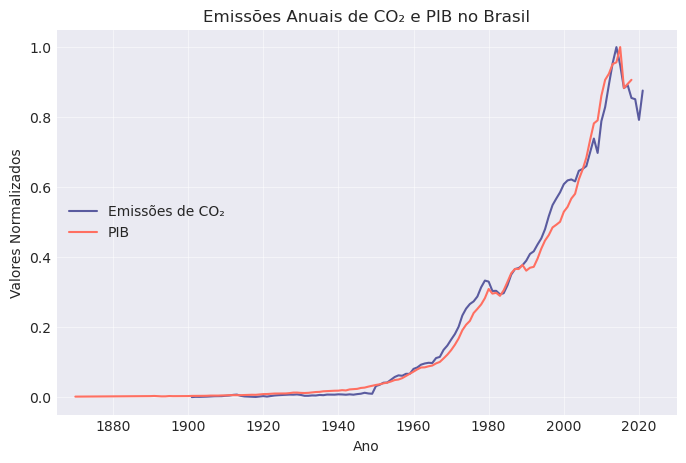

In [18]:
# Imprtar a função MinMaxScaler da biblioteca sklearn.preprocessing.
from sklearn.preprocessing import MinMaxScaler

# Inicializar o MinMaxScaler.
scaler = MinMaxScaler()

# Criar uma cópia de df_br antes de aplicar a transformação.
df_br_copy = df_br.copy()

# Criar novas colunas para os valores normalizados.
df_br_copy['co2_normalized'] = scaler.fit_transform(df_br_copy[['co2']])
df_br_copy['gdp_normalized'] = scaler.fit_transform(df_br_copy[['gdp']])

# Gerar um gráfico de linhas utilizando as colunas normalizadas.
plt.figure(figsize=(8, 5))

plt.plot(df_br_copy['year'], df_br_copy['co2_normalized'], label='Emissões de CO₂')
plt.plot(df_br_copy['year'], df_br_copy['gdp_normalized'], label='PIB')

plt.xlabel('Ano')
plt.xlim(1865, 2030) # Dados disponíveis a partir de 1865.
plt.ylabel('Valores Normalizados')
plt.title('Emissões Anuais de CO₂ e PIB no Brasil')

plt.legend(loc=6) # Alterar a posição da legenda.

plt.grid(alpha=0.5)

plt.show()

Agora, será gerado um gráfico de linhas entre emissões de CO₂ e PIB ao longo do tempo **incluindo emissões geradas por mudanças no uso da terra**.

Desse modo será possível visualizar se emissões geradas por mudanças no uso da terra são relevantes para o Brasil e devem figurar nesta análise, e de que modo impactam a relação entre emissões de CO₂ e PIB no Brasil.

Os valores serão normalizados seguindo o mesmo procedimento utilizado anteriormente.

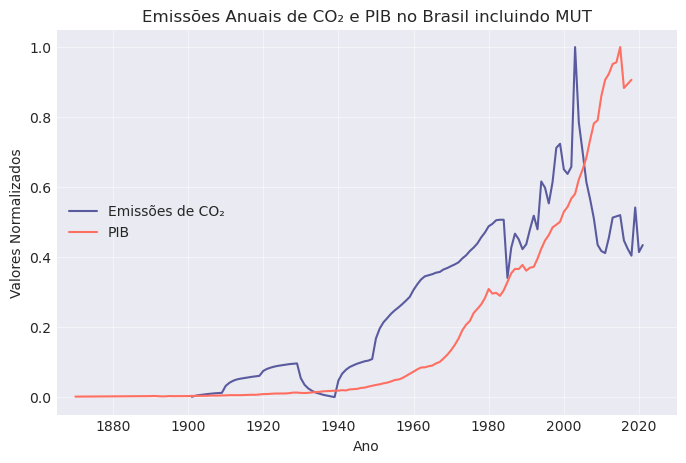

In [19]:
# Inicializar o MinMaxScaler.
scaler = MinMaxScaler()

# Criar uma cópia de df_br antes de aplicar a transformação.
df_br_copy_luc = df_br.copy()

# Criar novas colunas para os valores normalizados.
df_br_copy_luc['co2_including_luc_normalized'] = scaler.fit_transform(df_br_copy_luc[['co2_including_luc']])
df_br_copy_luc['gdp_normalized'] = scaler.fit_transform(df_br_copy_luc[['gdp']])

# Gerar um gráfico de linhas utilizando as colunas normalizadas.
plt.figure(figsize=(8, 5))

plt.plot(df_br_copy_luc['year'], df_br_copy_luc['co2_including_luc_normalized'], label='Emissões de CO₂')
plt.plot(df_br_copy_luc['year'], df_br_copy_luc['gdp_normalized'], label='PIB')

plt.xlabel('Ano')
plt.xlim(1865, 2030) # Dados disponíveis a partir de 1865.
plt.ylabel('Valores Normalizados')
plt.title('Emissões Anuais de CO₂ e PIB no Brasil incluindo MUT')

plt.legend(loc=6) # Alterar a posição da legenda.

plt.grid(alpha=0.5)

plt.show()

No primeiro gráfico de linhas gerado, o qual não inclui emissões geradas por mudanças no uso da terra, é visível que **o crescimento do PIB acompanha o crescimento das emissões de CO₂ no Brasil**. Com exceção de um período de redução das emissões de CO₂ entre meados dos anos 2000 e 2020, a tendência é de crescimento, tanto do PIB quanto das emissões de CO₂ do Brasil.

Já no segundo gráfico de linhas, o qual inclui emissões geradas por mudanças no uso da terra, nota-se que emissões de CO₂ e PIB ambos crescem até o **início dos anos 2000**. A partir deste período, há uma visível **desassociação entre emissões de CO₂ e PIB**, com redução do primeiro e crescimento do segundo. Alguns dos eventos que podem estar relacionados à redução das emissões geradas por mudanças no uso da terra incluem a Criação do Ministério do Meio Ambiente durante os anos 90, a realização da Rio-92, e a criação do Sistema Nacional de Unidades de Conservação (SNUC).

Tendo em mente tais diferenças, é importante considerar o papel das emissões geradas por mudanças no uso da terra no Brasil para responder a uma das perguntas propostas por este projeto: é possível desassociar o crescimento do PIB e as emissões de CO₂?

Para responder esta pergunta, será estudado o exemplo de um país que já realizaram tal feito: a **Suécia**.

Abaixo, será gerado um gráfico de linhas exibindo as emissões anuais de CO₂ e PIB da Suécia ao longo do tempo. Como feito para o Brasil, será realizada a normalização dos valores de emissões de CO₂ e PIB. As emissões geradas por mudanças no uso da terra são pouco relevantes no caso da Suécia; por isso, apenas um gráfico será gerado, sem considerar mudanças no uso da terra.

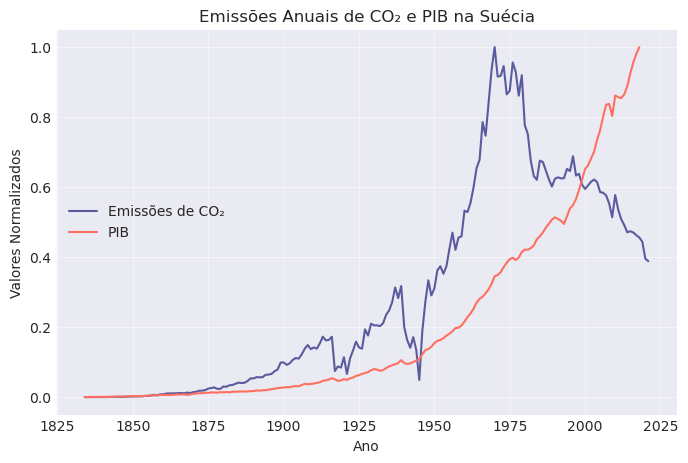

In [20]:
# Inicializar o MinMaxScaler.
scaler = MinMaxScaler()

# Criar uma cópia de df_se antes de aplicar a transformação.
df_se_copy = df_se.copy()

# Criar novas colunas para os valores normalizados
df_se_copy['co2_normalized'] = scaler.fit_transform(df_se_copy[['co2']])
df_se_copy['gdp_normalized'] = scaler.fit_transform(df_se_copy[['gdp']])

# Gerar um gráfico de linhas utilizando as colunas normalizadas.
plt.figure(figsize=(8, 5))

plt.plot(df_se_copy['year'], df_se_copy['co2_normalized'], label='Emissões de CO₂')
plt.plot(df_se_copy['year'], df_se_copy['gdp_normalized'], label='PIB')

plt.xlabel('Ano')
plt.ylabel('Valores Normalizados')
plt.title('Emissões Anuais de CO₂ e PIB na Suécia')

plt.legend(loc=6) # Alterar a posição da legenda.

plt.grid(alpha=0.5)

plt.show()

No gráfico de linhas gerado acima, observa-se a **desassociação das emissões de CO₂ do PIB a partir de 2000**: o PIB da Suécia continua a crescer, enquanto suas emissões de CO₂ passam a cair.

Em 1991, a Suécia foi um dos primeiros países a implementar um imposto de carbono, a qual foi aumentada gradativamente ao longo do tempo e é atualmente um dos mais altos impostos de carbono do mundo. É importante também ressaltar que a Suécia foi um dos países pioneiros na questão ambiental, tendo sido um dos primeiros países a instaurar uma agência de proteção ambiental em 1967 e o país-sede da primeira conferência das Nações Unidas sobre o meio ambiente.

Para entender outros possíveis **fatores que levaram a este cenário**, serão analisadas outras variáveis relevantes presentes no Dataset.

<a id="43"></a>
### 4.3. Emissões de CO₂ per capita do Brasil e da Suécia

Para visualizar **como as emissões de CO₂ do Brasil e da Suécia se comparam** ao longo do tempo, serão utilizados dados referentes às emissões de CO₂ per capita dos dos países. As emissões per capita representam as emissões médias de cada habitante daquele país, o que permite comparações entre países com tamanhos populacionais drasticamente diferentes (o Brasil possui cerca de 200 milhões de habitantes, enquanto a Suécia possui cerca de 10 milhões).

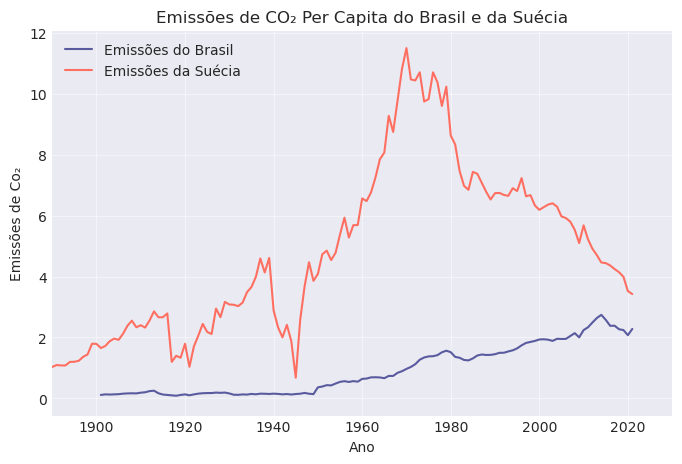

In [21]:
# Gerar um gráfico de linhas para emissões anuais de CO₂ per capita no Brasil e Suécia.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['co2_per_capita'], label='Emissões do Brasil')
plt.plot(df_se['year'], df_se['co2_per_capita'], label='Emissões da Suécia')

plt.xlabel('Ano')
plt.xlim(1890, 2030) # Dados para o Brasil disponíveis a partir de 1900.
plt.ylabel('Emissões de Co₂')
plt.title('Emissões de CO₂ Per Capita do Brasil e da Suécia')

plt.legend(loc=2) # Alterar a posição da legenda.

plt.grid(alpha=0.5)

plt.show()

Observa-se que a **Suécia emitiu mais CO₂ per capita do que o Brasil** durante todo o período de 1900 a 2021. Porém, a partir do final dos **anos 70**, as **emissões de CO₂ per capita da Suécia passam a cair**, se aproximando cada vez mais dos níveis do Brasil. Por outro lado, as **emissões de CO₂ per capita do Brasil têm aumentado** de maneira gradativa desde 1950, sem visível tendência de queda até 2021. Tal aumento pode estar relacionado à melhora nas condições de vida da população, visto que o Brasil é um país em desenvolvimento.

<a id="44"></a>
### <span style='background :MistyRose'>4.4. Emissões de CO₂ geradas por produção e por consumo no Brasil e na Suécia</span>

Pode-se questionar se a redução em emissões de CO₂ da Suécia não seria **apenas consequência da realocação da sua produção para outros países**, como a China e a Índia. Para responder esta pergunta, será gerado um gráfico de linhas para as emissões anuais de CO₂ geradas por **consumo** para Brasil e Suécia, a qual engloba as emissões geradas por **importações**. Serão utilizados os dados de emissão per capita para que sejam consideradas diferenças no tamanho populacional dos dois países.

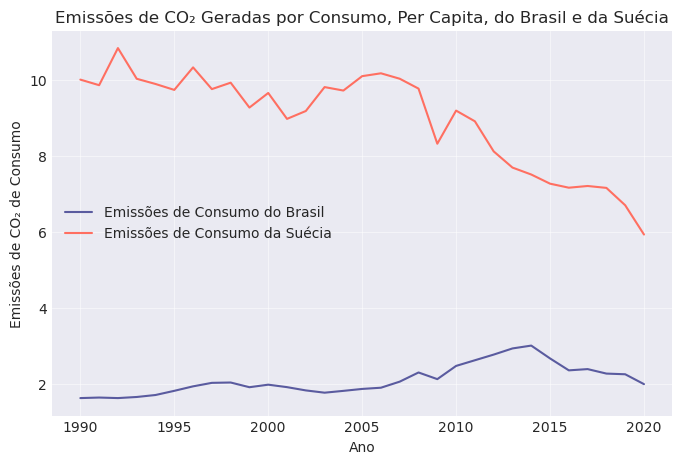

In [22]:
# Gerar um gráfico de linhas para emissões anuais de CO₂ geradas por consumo, per capita, do Brasil e da Suécia.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['consumption_co2_per_capita'], label='Emissões de Consumo do Brasil')
plt.plot(df_se['year'], df_se['consumption_co2_per_capita'], label='Emissões de Consumo da Suécia')

plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ de Consumo')
plt.title('Emissões de CO₂ Geradas por Consumo, Per Capita, do Brasil e da Suécia')

plt.legend()

plt.grid(alpha=0.5)

plt.show()

No gráfico, nota-se que as emissões de CO₂ per capita geradas por consumo **também estão em queda na Suécia**, o que indica que a redução das emissões de CO₂ no país **não é fruto apenas da realocação de emissões de produção para outros países**. Se fosse este o caso, os gráficos indicariam aumento nas emissões geradas por consumo na Suécia.

As emissões de CO₂ per capita geradas por consumo no Brasil são menores do que a Suécia durante todo o período de 1990 a 2020, com aumento entre 2007 e 2014, seguido por queda em 2015. Tal diferença pode ser explicada pelo **menor poder aquisitivo da população brasileira** em relação a sueca. A **queda nas emissões per capita a partir de 2015** pode ter relação com a crise econômica que se inicia nesse ano, reduzindo ainda mais o poder aquisitivo da população no Brasil.

Pode-se perguntar, então, qual é a **relação entre emissões de CO₂ geradas por consumo e aquelas geradas por produção no Brasil**, e qual delas tem maior impacto no total de CO₂ emitido pelo país. Serão gerados dois gráficos: o primeiro sem incluir emissões geradas por mudanças no uso da terra, e o segundo incluindo-as. Assim, será possível visualizar o impacto das emissões geradas por mudanças no uso da terra quando dividimos as emissões nestas duas categorias.

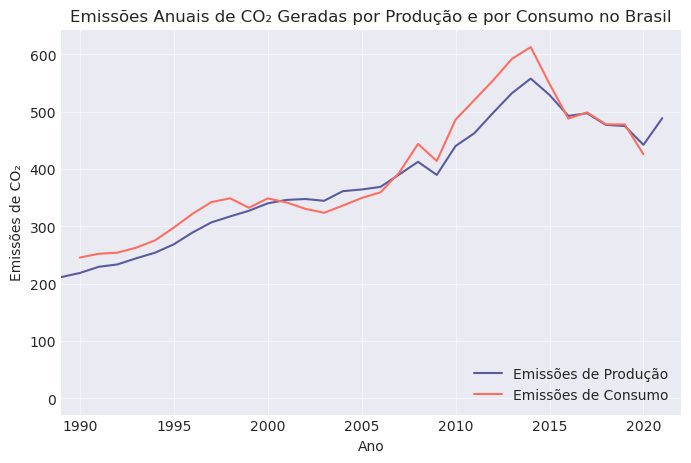

In [23]:
# Gerar um gráfico de linhas para emissões anuais de CO₂ geradas por consumo e por produção no Brasil, sem considerar MUT.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['co2'], label='Emissões de Produção')
plt.plot(df_br['year'], df_br['consumption_co2'], label='Emissões de Consumo')

plt.xlabel('Ano')
plt.xlim(1989, 2022) # Dados para emissões por consumo disponíveis a partir de 1990.
plt.ylabel('Emissões de CO₂')
plt.title('Emissões Anuais de CO₂ Geradas por Produção e por Consumo no Brasil')

plt.legend(loc=4)

plt.grid(alpha=0.5)

plt.show()

Quando não consideramos emissões geradas por mudanças no uso da terra, as emissões de CO₂ geradas por consumo e por produção no Brasil tendem a **se manter equivalentes ao longo do tempo**, em especial a partir de 2015, ano em que se inicia uma crise econômica no país.

Portanto, quando não consideramos mudanças no uso da terra, ambos os tipos de emissões contribuem de maneira equivalente para o total de emissões de CO₂ anuais do país.

Será gerado agora um novo gráfico de linhas considerando emissões geradas por mudanças no uso da terra.

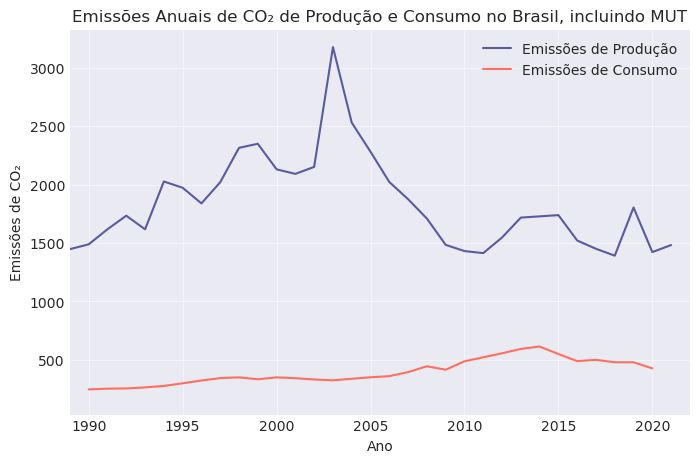

In [24]:
# Gerar um gráfico de linhas para emissões anuais de CO₂ geradas por consumo e por produção no Brasil, incluindo MUT.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['co2_including_luc'], label='Emissões de Produção')
plt.plot(df_br['year'], df_br['consumption_co2'], label='Emissões de Consumo')

plt.xlabel('Ano')
plt.xlim(1989, 2022)  # Dados para emissões por consumo disponíveis a partir de 1990.
plt.ylabel('Emissões de CO₂')
plt.title('Emissões Anuais de CO₂ de Produção e Consumo no Brasil, incluindo MUT')

plt.legend()

plt.grid(alpha=0.5)

plt.show()

Quando incluímos emissões de CO₂ geradas por **mudanças no uso da terra**, as emissões geradas por produção se tornam muito mais significativas do que aquelas geradas por consumo, mesmo com a queda nas emissões geradas por produção a partir de 2004.

Portanto, quando levamos em consideração as emissões geradas por mudanças no uso da terra, **as emissões geradas por produção têm maior impacto nas emissões totais do Brasil** do que aquelas geradas por consumo.

<a id="45"></a>
### <span style='background :MistyRose'>4.5. Composição das fontes emissoras de CO₂ no Brasil e na Suécia</span>

Agora, o projeto irá se voltar para as **fontes emissoras de CO₂** no Brasil e na Suécia. Conhecer a contribuição de cada uma das principais fontes emissoras de CO₂ é fundamental para desenvolver soluções eficazes para a descarbonização da economia, focando esforços nos principais responsáveis pelas emissões de CO₂ no país.

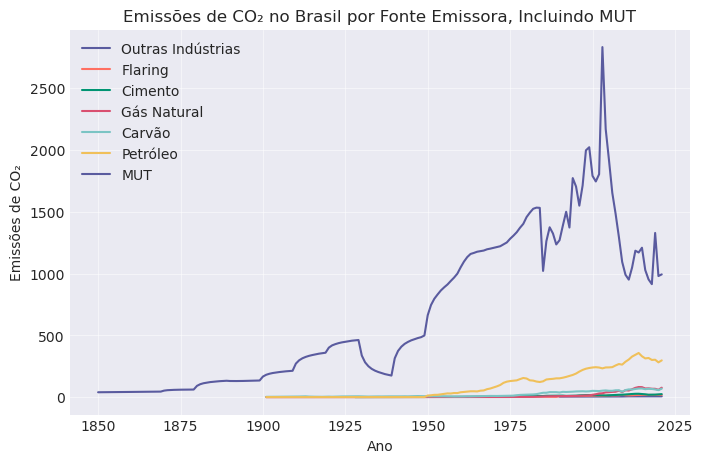

In [25]:
# Gerar um gráfico de área para emissões anuais de CO₂ no Brasil por fonte emissora, incluindo MUT.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['other_industry_co2'], label='Outras Indústrias')
plt.plot(df_br['year'], df_br['flaring_co2'], label='Flaring')
plt.plot(df_br['year'], df_br['cement_co2'], label='Cimento')
plt.plot(df_br['year'], df_br['gas_co2'], label='Gás Natural')
plt.plot(df_br['year'], df_br['coal_co2'], label='Carvão')
plt.plot(df_br['year'], df_br['oil_co2'], label='Petróleo')
plt.plot(df_br['year'], df_br['land_use_change_co2'], label='MUT')


plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂')
plt.title('Emissões de CO₂ no Brasil por Fonte Emissora, Incluindo MUT')

plt.legend()

plt.grid(alpha=0.5)

plt.show()

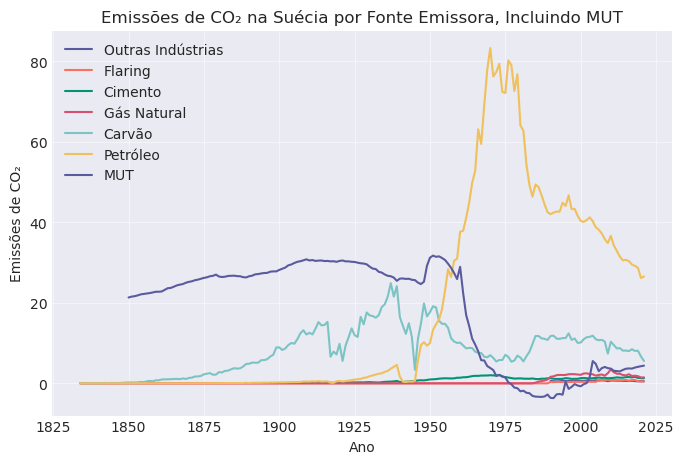

In [26]:
# Gerar um gráfico de área para emissões anuais de CO₂ na Suécia por fonte emissora, incluindo MUT.
plt.figure(figsize=(8, 5))

plt.plot(df_se['year'], df_se['other_industry_co2'], label='Outras Indústrias')
plt.plot(df_se['year'], df_se['flaring_co2'], label='Flaring')
plt.plot(df_se['year'], df_se['cement_co2'], label='Cimento')
plt.plot(df_se['year'], df_se['gas_co2'], label='Gás Natural')
plt.plot(df_se['year'], df_se['coal_co2'], label='Carvão')
plt.plot(df_se['year'], df_se['oil_co2'], label='Petróleo')
plt.plot(df_se['year'], df_se['land_use_change_co2'], label='MUT')

plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂')
plt.title('Emissões de CO₂ na Suécia por Fonte Emissora, Incluindo MUT')

plt.legend()

plt.grid(alpha=0.5)

plt.show()

No Brasil, a maior fonte emissora de CO₂ são as **mudanças no uso da terra**, as quais, em 2021, eram mais do que o **dobro** das emissões geradas por petróleo. A partir dos anos 2000, nota-se uma queda acentuada nas emissões geradas por mudanças no uso da terra, com **aumento gradual das emissões advindas do uso do petróleo**. 

Já na Suécia, o petróleo é a maior fonte emissora de CO₂. **A partir dos anos 80, passa a haver uma queda contínua nas emissões de petróleo** que se sustenta até o presente. É possível que esta queda esteja relacionada ao imposto de carbono mencionado anteriormente, o qual também engloba a geração de energia por combustíveis fósseis como o petróleo.

É interessante notar que mudanças no uso da terra também eram as maiores fontes de emissão da Suécia até os anos 50, quando o petróleo passa a ser a maior fonte emissora. Dois eventos podem estar relacionados a esta queda. Um deles é a mudança nos padrões de produção de leite da Suécia a partir dos anos 50, quando o gado passa a ser retirado das florestas e confinado em pastagens. A partir dos anos 60, a Suécia passa também a contar com uma das legislações ambientais mais rígidas do mundo.

Para melhor visualizar as mudanças na composição das fontes industriais e combustíveis emissoras de CO₂ no Brasil, será gerado um novo gráfico de área, sem considerar emissões geradas por mudanças no uso da terra.

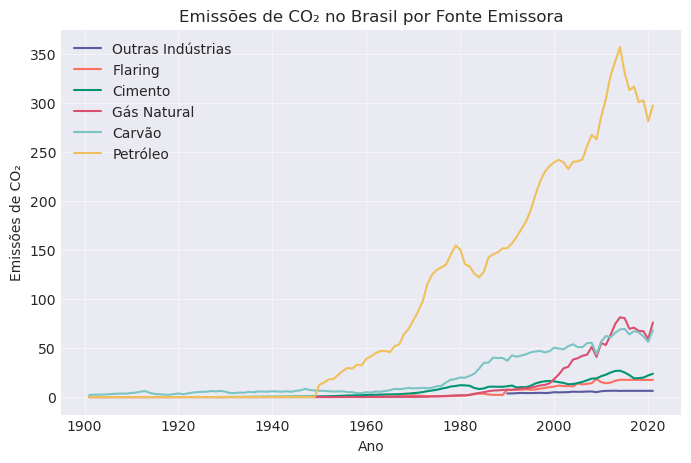

In [27]:
# Gerar um gráfico de área para emissões anuais de CO₂ no Brasil por fonte emissora, sem considerar MUT.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['other_industry_co2'], label='Outras Indústrias')
plt.plot(df_br['year'], df_br['flaring_co2'], label='Flaring')
plt.plot(df_br['year'], df_br['cement_co2'], label='Cimento')
plt.plot(df_br['year'], df_br['gas_co2'], label='Gás Natural')
plt.plot(df_br['year'], df_br['coal_co2'], label='Carvão')
plt.plot(df_br['year'], df_br['oil_co2'], label='Petróleo')

plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂')
plt.title('Emissões de CO₂ no Brasil por Fonte Emissora')

plt.legend(loc=2) # Alterar a posição da legenda para que não se sobreponha ao gráfico.

plt.grid(alpha=0.5)

plt.show()

Quando desconsideramos as emissões geradas por mudanças no uso da terra, vê-se que **as emissões geradas pelo uso do petróleo são significativamente maiores do que as demais**: em 2020, as emissões geradas pelo petróleo eram mais do que o **triplo** daquelas geradas pelo carvão e gás natural. Diferentemente da Suécia, onde as emissões geradas pelo uso do petróleo têm caído desde os anos 80, as emissões advindas do petróleo no Brasil têm **aumentado desde os anos 50**, com uma leve queda em 2019.

<a id="46"></a>
### <span style='background :MistyRose'>4.6. Associação entre emissões geradas por diferentes fontes e emissões anuais de CO₂ no Brasil e Suécia</span>

Considerando que foram observadas reduções tanto nas emissões geradas por petróleo quanto nas emissões anuais da Suécia, e aumento das emissões geradas por petróleo e das emissões anuais do Brasil (excluindo mudanças no uso da terra), pode-se suspeitar a **existência de uma associação entre as duas variáveis**.

Existe alguma relação entre emissões geradas por petróleo e emissões anuais nos dois países? Se sim, o aumento de um leva ao aumento do outro, e vice-versa?

Serão gerados gráficos de dispersão entre **emissões anuais de CO₂ e emissões por petróleo** para cada um dos países para responder a estas perguntas. Gráficos de dispersão permitem visualizar a presença ou ausência de uma associação entre variáveis quantitativas a partir dos padrões criados pelos pontos do gráfico.

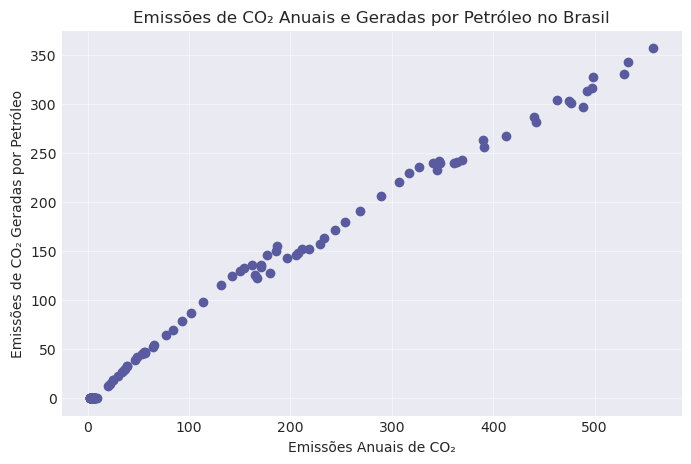

In [28]:
# Gerar um gráfico de dispersão para emissões anuais de CO₂ e emissões por petróleo no Brasil.
plt.figure(figsize=(8, 5))

plt.scatter(x = df_br['co2'], y = df_br['oil_co2'])

plt.xlabel('Emissões Anuais de CO₂')
plt.ylabel('Emissões de CO₂ Geradas por Petróleo')
plt.title('Emissões de CO₂ Anuais e Geradas por Petróleo no Brasil')

plt.grid(alpha=0.5)

plt.show()

Percebe-se que, em sua grande maioria, **um aumento nas emissões anuais de CO₂ está associado a um aumento também nas emissões geradas pelo uso do petróleo no Brasil**. Portanto, fica clara a existência de uma **relação linear** entre as duas variáveis, com o aumento de uma levando ao aumento da outra; do mesmo modo, a diminuição de uma também leva à diminuição da outra.

É possível medir a força de uma relação linear entre duas variáveis através da **correlação de Pearson**. De maneira geral, uma correlação de 0.3 indica a existência de uma relação linear, enquanto uma correlação maior do que 0.6 sugere uma forte relação linear entre as variáveis.

Será utilizada o pacote `pearsonr` da biblioteca `scipy.stats` para calcular a força da relação entre emissões anuais de CO₂ e emissões geradas pelo uso do petróleo no Brasil.

In [29]:
# Para utilizar pearsonr, é preciso primeiro remover os valores nulos das variáveis.
br_pearson = df_br.dropna(subset=['co2', 'oil_co2'])

# Importar a função pearsonr da biblioteca scipy.stats
from scipy.stats import pearsonr

# Calcular a correlação de Pearson para as duas variáveis.
corr_data, p = pearsonr(br_pearson['co2'], br_pearson['oil_co2'])
round(corr_data, 3) # Arredondar o valor final para 3 casas decimais.

0.995

Foi obtida uma correlação de **0.995** entre as emissões anuais de CO₂ e emissões advindas do petróleo no Brasil, apontando para a existência de uma **associação positiva** (ou seja, o aumento de uma variável leva a diminuição da outra, e vice-versa) **e forte** entre as duas variáveis.

Portanto, podemos concluir que o **aumento das emissões geradas pelo petróleo está associada ao aumento das emissões anuais de CO₂ no Brasil**.

O mesmo procedimento será realizado para verificar a existência de uma associação entre emissões anuais de CO₂ e emissões geradas pelo uso do petróleo na Suécia.

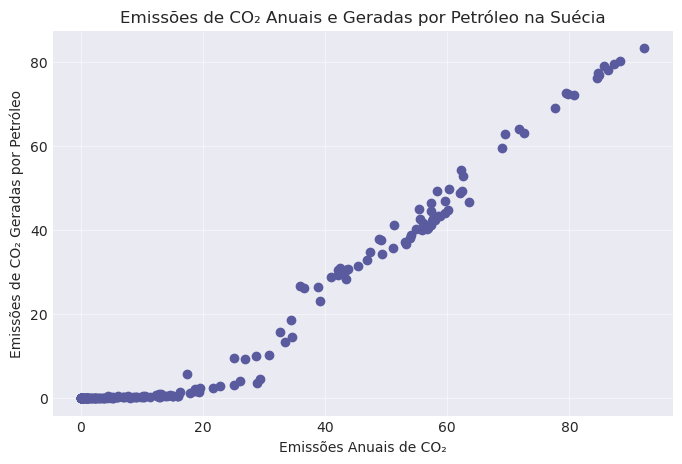

In [30]:
# Gerar um gráfico de dispersão para emissões anuais de CO₂ e emissões por petróleo na Suécia.
plt.figure(figsize=(8, 5))

plt.scatter(x = df_se['co2'], y = df_se['oil_co2'])

plt.xlabel('Emissões Anuais de CO₂')
plt.ylabel('Emissões de CO₂ Geradas por Petróleo')
plt.title('Emissões de CO₂ Anuais e Geradas por Petróleo na Suécia')

plt.grid(alpha=0.5)

plt.show()

Novamente, vê-se que, em geral, o **aumento das emissões anuais de CO₂ está associado a um aumento também nas emissões geradas pelo uso do petróleo na Suécia**, e vice-versa.

Será medida a força da associação entre as duas variáveis através da correlação de Pearson.

In [31]:
# Para utilizar pearsonr, é preciso primeiro remover os valores nulos das variáveis.
se_pearson = df_se.dropna(subset=['co2', 'oil_co2'])

# Calcular a correlação de Pearson para as duas variáveis.
corr_data, p = pearsonr(se_pearson['co2'], se_pearson['oil_co2'])
round(corr_data, 3) # Arredondar o valor final para 3 casas decimais.

0.974

Foi obtido o valor de **0.974**, o que indica que também para a Suécia há uma **associação positiva e forte** entre emissões geradas pelo uso do petróleo e emissões anuais de CO₂.

Portanto, podemos concluir que **a diminuição das emissões geradas pelo petróleo está associada à diminuição das emissões anuais de CO₂ na Suécia**.

Por fim, visto que as emissões geradas por **mudanças no uso da terra** compõem grande parte das emissões anuais totais do Brasil, iremos verificar se há uma asssociação entre as duas variáveis e, se houver, calcular a força da associação entre elas. Isto pode elucidar **qual das duas variáveis** — emissões geradas por petróleo ou por mudanças no uso da terra — **está impulsionando com maior força** as emissões totais anuais do Brasil.

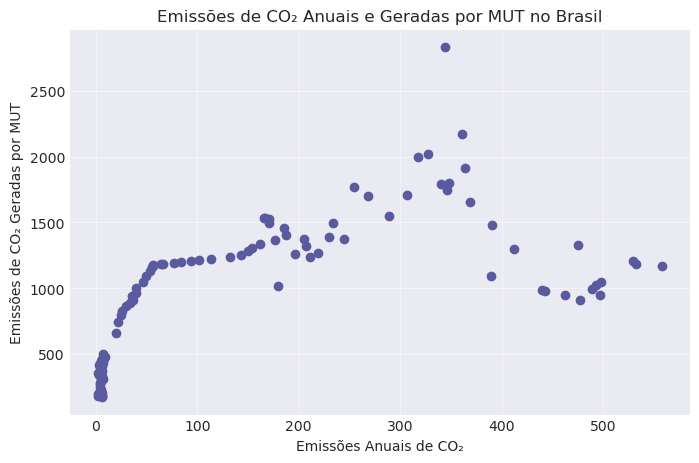

In [32]:
# Gerar um gráfico de dispersão para emissões anuais de CO₂ e emissões por MUT no Brasil.
plt.figure(figsize=(8, 5))

plt.scatter(x = df_br['co2'], y = df_br['land_use_change_co2'])

plt.xlabel('Emissões Anuais de CO₂')
plt.ylabel('Emissões de CO₂ Geradas por MUT')
plt.title('Emissões de CO₂ Anuais e Geradas por MUT no Brasil')

plt.grid(alpha=0.5)

plt.show()

Nota-se que, diferentemente dos outros dois gráficos de dispersão gerados anteriormente, **não está tão clara a existência de uma relação linear** entre emissões anuais e emissões geradas por mudanças no uso da terrano Brasil.

O cálculo da correlação de Pearson deixará mais claro a existência ou não de uma associação entre as variáveis, e a força dessa associação caso esteja presente.

In [33]:
# Para utilizar pearsonr, é preciso primeiro remover os valores nulos das variáveis.
br_pearson = df_br.dropna(subset=['co2', 'land_use_change_co2'])

# Importar a função pearsonr da biblioteca scipy.stats
from scipy.stats import pearsonr

# Calcular a correlação de Pearson para as duas variáveis.
corr_data, p = pearsonr(br_pearson['co2'], br_pearson['land_use_change_co2'])
round(corr_data, 3) # Arredondar o valor final para 3 casas decimais.

0.675

Foi obtido o valor de **0.675**, o que indica a existência de uma associação forte e positiva entre emissões geradas por mudanças no uso da terra e emissões totais anuais do Brasil. Isso significa que um aumento nas emissões geradas por mudanças no uso da terra está associado a um aumento nas emissões totais anuais do Brasil, assim como uma possível redução.

Considerando que a força da **associação entre emissões geradas por petróleo** e emissões totais anuais do Brasil (0.995) é **mais forte** do que aquela entre emissões geradas por mudanças no uso da terra e emissões totais (0.675), é plausível suspeitar que **o petróleo é a fonte emissora que mais impulsiona o crescimento das emissões do Brasil**. Isto é corroborado pela queda das emissões geradas por mudanças no uso da terra no Brasil desde os anos 2000, e crescimento daquelas geradas pelo uso do petróleo desde 1950, sem tendência clara de queda.

<a id="47"></a>
### <span style='background :MistyRose'>4.7. Intensidade de carbono</span>

Por fim, para entender **como a Suécia foi capaz de diminuir suas emissões geradas pelo uso do petróleo**, pode-se comparar a intensidade de carbono da produção de energia no Brasil e na Suécia. A intensidade de carbono mede a **quantidade de carbono emitido por unidade de energia**, mensurado em quilogramas de CO₂ por quilowatt-hora. Assim, será possível verificar se a Suécia emite menos carbono por unidade de energia do que o Brasil, o que pode apontar possíveis caminhos para a descarbonização do país.

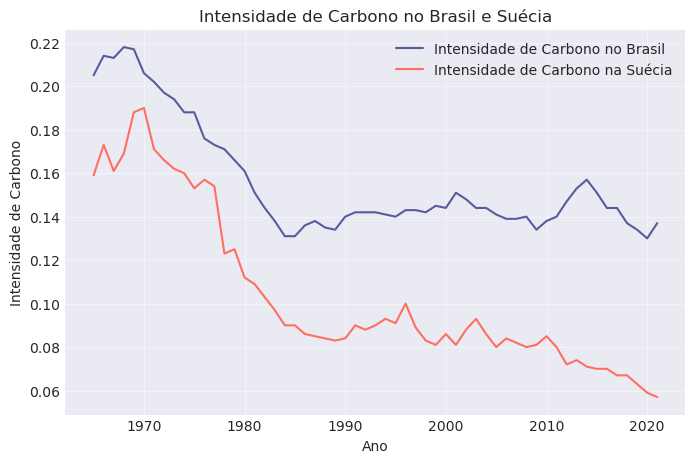

In [34]:
# Gerar um gráfico de linhas para intensidade de carbono no Brasil e na Suécia.
plt.figure(figsize=(8, 5))

plt.plot(df_br['year'], df_br['co2_per_unit_energy'], label='Intensidade de Carbono no Brasil')
plt.plot(df_se['year'], df_se['co2_per_unit_energy'], label='Intensidade de Carbono na Suécia')

plt.xlabel('Ano')
plt.ylabel('Intensidade de Carbono')
plt.title('Intensidade de Carbono no Brasil e Suécia')

plt.grid(alpha=0.5)

plt.legend()

plt.show()

A **Suécia emite quase três vezes menos carbono por unidade de energia em comparação ao Brasil**, com tendência de queda desde os anos 70. Percebe-se que a intensidade de carbono também sofreu queda no Brasil nos anos 70; porém, esta se estabilizou a partir dos anos 90, e não apresenta visível tendência de queda desde então.

Portanto, a Suécia emite menos carbono para cada unidade de energia consumida no país. Isto pode estar associado à **adoção de fontes energéticas limpas e menor dependência dos combustíveis fósseis**, o que é corroborado pela queda do consumo de petróleo no país desde os anos 80 e pela implementação do imposto de carbono nos anos 90. Atualmente, cerca de **60%** da matriz energética sueca é composta por fontes de energia renováveis.

<a id="5"></a>
## <span style='background :MistyRose'>5. Conclusões</span>

* No Brasil, **emissões anuais de CO₂ e PIB crescem concomitantemente** quando não são consideradas emissões geradas por mudanças no uso da terra. Quando estas são consideradas, observa-se uma **desassociação entre emissões anuais de CO₂ e PIB no Brasil**. Isto pode estar relacionado à diminuição dos níveis de **desmatamento** a partir do início dos anos 2000.
* Na Suécia, a partir de 2000, as **emissões anuais de CO₂ passam a cair, enquanto o PIB do país continua a crescer**. Isto demonstra que o crescimento econômico com diminuição das emissões de CO₂ **é possível**.
* As emissões de CO₂ per capita da Suécia são maiores do que as do Brasil. Porém, estas emissões **têm caído na Suécia**, enquanto **continuam a crescer no Brasil**.
* Emissões de CO₂ geradas por consumo (ou seja, por importações) **cresceram gradualmente no Brasil até 2013**, quando passaram então a sofrer queda. A Suécia, por outro lado, apresenta **diminuição em suas emissões de CO₂ geradas pelo consumo**, o que descarta a possibilidade de que as emissões suecas foram reduzidas devido ao deslocamento de sua produção para outros países.
* A **Suécia emite mais CO₂ gerado por consumo per capita do que o Brasil**, o que pode ter relação com o menor poder aquisitivo da população brasileira quando comparada à sueca.
* No Brasil, **as emissões de CO₂ geradas pela produção são significativamente maiores do que aquelas geradas pelo consumo** quando emissões geradas por mudanças no uso da terra são consideradas dentro das emissões de produção. Quando estas não são consideradas, as emissões geradas por produção e consumo são, no geral, equivalentes. Isto aponta para o **grande impacto que as mudanças no uso da terra têm** sobre as emissões de CO₂ do Brasil.
* **Emissões geradas por mudanças no uso da terra são as maiores fontes de emissão de CO₂ do Brasil**. O **petróleo vem em segundo lugar**, tendo impacto significativamente maior do que qualquer outra fonte emissora industrial ou combustível.
* Na Suécia, o **petróleo é a maior fonte emissora de CO₂**. Estas emissões passam a cair a partir dos anos 80, o que coincide com a diminuição de suas emissões anuais de CO₂ a partir do mesmo período.
* **Emissões de CO₂ geradas pelo petróleo e emissões anuais de CO₂ estão fortemente associadas** nos dois países. Isto indica que o **aumento das emissões geradas pelo petróleo impulsiona o aumento das emissões anuais de CO₂** no Brasil apesar da queda nas emissões geradas por mudanças no uso da terra; do mesmo modo, **a diminuição das emissões geradas pelo petróleo é um importante fator na redução das emissões anuais de CO₂ da Suécia**.
* **O Brasil emite significativamente mais carbono por unidade de energia consumida do que a Suécia**. Isto pode estar relacionado à transição da matriz energética sueca para **fontes de energia renováveis**, principalmente no que diz respeito à redução do uso do petróleo.

<a id="6"></a>
## <span style='background :MistyRose'>6. Recomendações</span>

* Priorizar a **redução das emissões de CO₂ geradas por produção**. A redução de emissões geradas por consumo também deve ser considerada, mas com menor prioridade.
* Dentre as emissões geradas por produção, priorizar:
    * A **redução de emissões geradas pelo uso do petróleo**, a qual pode ser alcançada através de sua substituição por fontes energéticas renováveis, como a energia solar, eólica, e biomassa;
    * A **redução de emissões geradas por mudanças no uso da terra**, a qual pode ser alcançada através da redução do desmatamento e valorização da floresta em pé.
* **Reduzir a intensidade de carbono** do Brasil através da redução do uso do petróleo e transição para uma matriz energética limpa.
* O exemplo de países desenvolvidos que foram capazes de diminuir suas emissões pode apontar caminhos para que o mesmo seja alcançado no nosso país, mas qualquer solução proposta a partir destas recomendações deve **considerar o contexto histórico, econômico, social e ambiental do Brasil** para que sejam realmente efetivas.

<a id="7"></a>
## <span style='background :MistyRose'>7. Apêndice</span>

<a id="71"></a>
### <span style='background :MistyRose'>7.1. Emissões anuais de CO₂ por classificação de renda</span>

A seguinte análise escapa ligeiramente do escopo do projeto, mas pode oferecer *insights* sobre o contexto econômico mundial por trás das emissões anuais de CO₂ do Brasil e da Suécia.

Será usado o DataFrame original para agrupar os países em quatro categorias de renda, de acordo com a classificação utilizada pelo [New World Bank](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups) (renda alta, média-alta, média-baixa, ou baixa) e observar se são visualizadas **tendências nas emissões anuais de CO₂ por categoria de renda**. A tendência dos países de renda alta, como a Suécia, é de redução de suas emissões anuais de CO₂? E quanto aos países de renda média-alta, como o Brasil? Suécia e Brasil seguem a mesma tendência de suas categorias?

O primeiro passo será a criação de novos DataFrames a partir do DataFrame original, cada um correspondente a uma categoria de renda. Então, usando DataFrames para cada categoria, será gerado um gráfico de linhas que compara as emissões anuais de CO₂ per capita de cada categoria ao longo do tempo. O gráfico a ser gerado abaixo não irá considerar mudanças no uso da terra.

In [39]:
# Selecionar os dados referentes a cada grupo, e carregar cada um num DataFrame.
high_income = df[df.country == 'High-income countries']
upper_middle_income = df[df.country == 'Upper-middle-income countries']
lower_middle_income = df[df.country == 'Lower-middle-income countries']
low_income = df[df.country == 'Low-income countries']

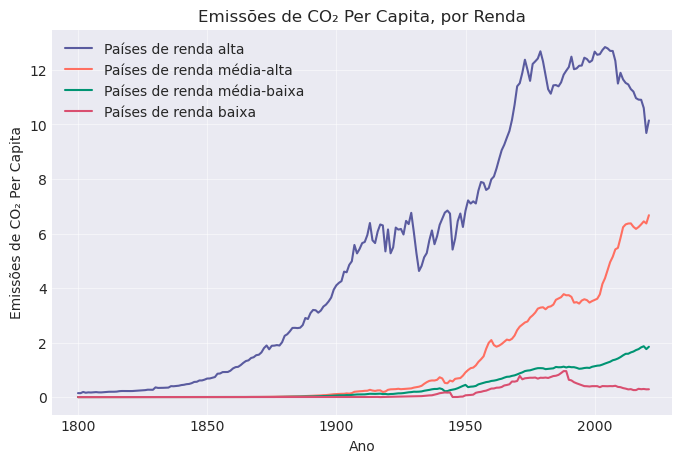

In [40]:
# Gerar um gráfico de linhas para emissões de CO₂ per capita de acordo com a renda do país.
plt.figure(figsize=(8, 5))

plt.plot(high_income['year'], high_income['co2_per_capita'], label='Países de renda alta')
plt.plot(upper_middle_income['year'], upper_middle_income['co2_per_capita'], label='Países de renda média-alta')
plt.plot(lower_middle_income['year'], lower_middle_income['co2_per_capita'], label='Países de renda média-baixa')
plt.plot(low_income['year'], low_income['co2_per_capita'], label='Países de renda baixa')

plt.xlabel('Ano')
plt.xlim(1790, 2030) # Dados disponíveis a partir de 1800.
plt.ylabel('Emissões de CO₂ Per Capita')
plt.title('Emissões de CO₂ Per Capita, por Renda')

plt.legend()
plt.grid(alpha=0.5)

plt.show()

Assim como observado para as emissões anuais de CO₂ per capita da Suécia, **as emissões anuais dos países de renda alta apresentam tendência de queda**. Neste caso, as emissões passam a cair a partir do início dos anos 2000; a Suécia, por outro lado, apresenta redução em suas emissões anuais mais cedo, a partir dos anos 80.

De maneira similar ao Brasil, **os países de renda média-alta apresentam tendência de aumento de suas emissões anuais de CO₂ per capita**, intensificada a partir dos anos 2000. É interessante notar que, no Brasil, as emissões geradas por outras fontes além das mudanças no uso da terra continuam a aumentar de modo semelhante ao observado para países de renda média-alta.

Apesar da queda nas emissões anuais de carbono dos países de renda alta, e da tendência de aumento das emissões em países de renda média-alta, **os países de renda alta continuam a ser aqueles que mais emitem carbono anualmente**, por uma margem considerável.

Um novo gráfico de linhas será gerado para as emissões anuais de CO₂ per capita de cada categoria ao longo do tempo; agora, incluindo mudanças no uso da terra.

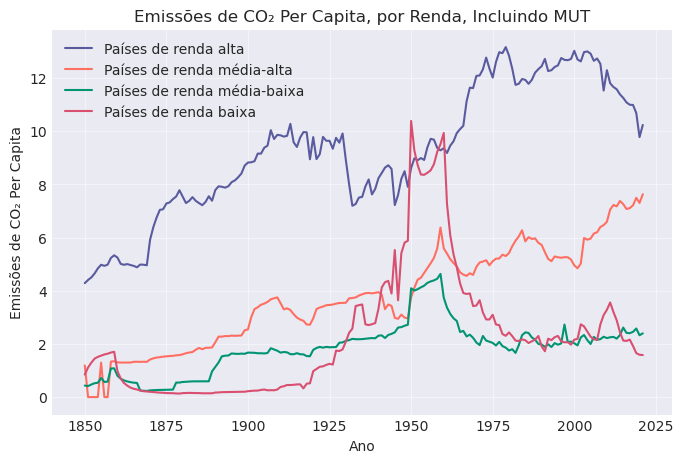

In [41]:
# Gerar um gráfico de linhas para emissões de CO₂ per capita de acordo com a renda do país, incluindo MUT.
plt.figure(figsize=(8, 5))

plt.plot(high_income['year'], high_income['co2_including_luc_per_capita'], label='Países de renda alta')
plt.plot(upper_middle_income['year'], upper_middle_income['co2_including_luc_per_capita'], label='Países de renda média-alta')
plt.plot(lower_middle_income['year'], lower_middle_income['co2_including_luc_per_capita'], label='Países de renda média-baixa')
plt.plot(low_income['year'], low_income['co2_including_luc_per_capita'], label='Países de renda baixa')

plt.xlabel('Ano')
plt.xlim(1840, 2030) # Dados disponíveis a partir de 1850.
plt.ylabel('Emissões de CO₂ Per Capita')
plt.title('Emissões de CO₂ Per Capita, por Renda, Incluindo MUT')

plt.legend()
plt.grid(alpha=0.5)

plt.show()

Nota-se um gráfico um tanto diferente quando consideramos emissões anuais de CO₂ per capita incluindo aquelas geradas por mudanças no uso da terra. Há uma **menor diferença entre países de renda alta e países de renda média-alta** — cerca de 2 milhões de toneladas, enquanto o gráfico anterior mostrava uma diferença de quase 4 milhões de toneladas ao ano em 2021. Podemos inferir, então, que **as emissões geradas por mudanças no uso da terra têm grande impacto não somente no Brasil, como também nos demais países de renda média-alta**; e que, assim como na Suécia, as demais fontes emissoras (como petróleo e carvão) têm impacto muito mais significativo nas emissões de países de renda alta em comparação às mudanças no uso da terra.

Entretanto, é mantida a tendência de queda das emissões dos países de renda alta e de aumento das emissões em países de renda média-alta, e também o fato de que países de renda alta continuam a ser os maiores emissores de CO₂ per capita.

Conclui-se que:
* Os países de **renda média-alta**, como o Brasil, apresentam tendência de **aumento** de suas emissões de CO₂, enquanto os países de **renda alta** seguem a mesma tendência de **redução** das emissões que a Suécia.
* Assim como no Brasil, as **emissões de CO₂ geradas por mudanças no uso da terra impulsionam** as emissões dos países de **renda média-alta**.
* Países de **renda alta**, como a Suécia, apesar de apresentarem queda nas emissões, ainda são os **maiores emissores de carbono do mundo**.
* A crise climática tem escala global, e as consequências das emissões de cada país ultrapassam suas fronteiras. Portanto, países de **renda alta** têm **responsabilidade gobal de continuar a reduzir suas altas emissões**. Além disso, a **cooperação internacional** é fundamental para que países **econômica e socialmente vulneráveis** sejam capazes de lidar com os efeitos da crise climática.